Data cleaning


In [ ]:
!pip install sodapy

import pandas as pd
from sodapy import Socrata

client = Socrata("data.iowa.gov", None)
results = client.get("m3tr-qhgy", limit=500000)
results_df = pd.DataFrame.from_records(results)
results_df

,invoice_line_no,date,store,name,address,city,zipcode,store_location,county_number,county,...,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons,:@computed_region_3r5t_5243,:@computed_region_wnea_7qqw,:@computed_region_i9mz_6gmt,:@computed_region_uhgg_e8y2,:@computed_region_e7ym_nrbf
0,INV-28428700031,2020-07-01T00:00:00.000,5070,JEFF'S MARKET / WILTON,101 E 4TH ST,WILTON,52778,"{'type': 'Point', 'coordinates': [-91.016579, ...",70,MUSCATINE,...,6.93,2,13.86,1.50,0.39,872,19,269,68,1835
1,INV-28499500009,2020-07-06T00:00:00.000,5207,JIM'S FOODS / CEDAR RAPIDS,"812, SIXTH ST SW",CEDAR RAPIDS,52404,"{'type': 'Point', 'coordinates': [-91.67707300...",57,LINN,...,2.99,48,143.52,9.60,2.53,793,18,264,45,287
2,INV-28456200015,2020-07-03T00:00:00.000,5425,SPIRITS LIQUOR,109 E 1ST ST. # B,GRIMES,50111,"{'type': 'Point', 'coordinates': [-93.793812, ...",77,POLK,...,5.33,2,10.66,0.75,0.19,654,25,315,64,1878
3,INV-28425700049,2020-07-01T00:00:00.000,5257,MAD AVE QUIK SHOP,"405, MADISON AVE",OTTUMWA,52501,NaN,90,WAPELLO,...,29.22,12,350.64,12.00,3.17,NaN,NaN,NaN,NaN,NaN
4,INV-28451200011,2020-07-02T00:00:00.000,4668,CLEAR LAKE PAYLESS FOODS,20 SOUTH 4TH ST,CLEARLAKE,50428,"{'type': 'Point', 'coordinates': [-93.380368, ...",17,CERRO GORDO,...,4.50,12,54.00,9.00,2.37,734,16,207,17,1373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,INV-31902600012,2020-11-13T00:00:00.000,4320,FAREWAY STORES #470 / PERRY,1315 WILLIS AVE,PERRY,50220,"{'type': 'Point', 'coordinates': [-94.103123, ...",25,DALLAS,...,20.25,12,243.00,9.00,2.37,387,27,331,62,1746
499996,INV-31971300054,2020-11-16T00:00:00.000,2524,HY-VEE FOOD STORE / DUBUQUE,3500 DODGE ST,DUBUQUE,52001,NaN,31,DUBUQUE,...,10.50,3,31.50,2.25,0.59,NaN,NaN,NaN,NaN,NaN
499997,INV-31988100040,2020-11-17T00:00:00.000,5423,STAMMER LIQUOR CORP,615 2ND AVE,SHELDON,51201,"{'type': 'Point', 'coordinates': [-95.854899, ...",71,O'BRIEN,...,39.00,1,39.00,0.75,0.19,308,36,415,13,293
499998,INV-31868600095,2020-11-11T00:00:00.000,2648,HY-VEE #4 / WDM,555 S 51ST ST,WEST DES MOINES,50265,"{'type': 'Point', 'coordinates': [-93.773557, ...",77,POLK,...,11.43,6,68.58,10.50,2.77,579,27,333,64,1878


In [ ]:
results_df.dtypes

,0
invoice_line_no,object
date,object
store,object
name,object
address,object
city,object
zipcode,object
store_location,object
county_number,object
county,object


In [ ]:
results_df.drop(columns=['address','county_number', 'sale_gallons', 'store_location', 'pack', ':@computed_region_3r5t_5243',':@computed_region_wnea_7qqw', ':@computed_region_i9mz_6gmt', ':@computed_region_uhgg_e8y2', ':@computed_region_e7ym_nrbf'], inplace=True)
results_df['date'] = pd.to_datetime(results_df['date'])
results_df['month'] = results_df['date'].dt.month
results_df['year'] = results_df['date'].dt.year
results_df
results_df[['sale_dollars', 'sale_liters', 'bottle_volume_ml']] = results_df[['sale_dollars', 'sale_liters', 'bottle_volume_ml']].astype('float64')
#results_df['sale_liters'] = results_df['sale_liters'].astype('float64')
#results_df['sale_gallons'] = results_df['sale_gallons'].astype('float64')

https://soda.demo.socrata.com/resource/4tka-6guv.json?$limit=50&$offset=150
https://data.iowa.gov/resource/m3tr-qhgy.json$limit=50000

In [ ]:
results = client.get("tjnj-ed6z",limit=50000)
unemploymentData = pd.DataFrame.from_records(results)
unemploymentData.columns


Index(['state_fips', 'area_type', 'area_name', 'year', 'month',
       'seasonally_adjusted', 'laborforce', 'employment', 'unemployment',
       'unemployment_rate', 'labforce_part_rate'],
      dtype='object')

In [ ]:
#Alcohol = client.get("gckp-fe7r", limit=10000)
#alc_prices_df = pd.DataFrame.from_records(Alcohol)
#alc_prices_df

In [ ]:
results = client.get("gk9s-gz9c",limit=3000)
countyData = pd.DataFrame.from_records(results)
countyData

,unique_line_id,fiscal_year_ending,county,county_name,public_safety_legal_services,physical_health_social_services,mental_health_mr_dd,co_environment_education,roads_transportation,government_services_to_residents,...,total_expenditures,increase_decrease_in_reserves,total_ending_fund_balance,total_requirements,primary_county_coordinates,:@computed_region_uhgg_e8y2,:@computed_region_e7ym_nrbf,:@computed_region_i9mz_6gmt,:@computed_region_wnea_7qqw,:@computed_region_3r5t_5243
0,2011_52_JOHNSON_EXPEND_SA,2011,52,JOHNSON,20189127,8594931,13266037,3250069,6939002,2152447,...,92601309,0,13210946,105812255,"{'type': 'Point', 'coordinates': [-91.5880849,...",61,1792,287,22,268
1,2014_2_ADAMS_EXPEND_SA,2014,2,ADAMS,1119300,278111,242559,719175,2799000,244348,...,7705043,0,2365957,10071000,"{'type': 'Point', 'coordinates': [-94.6991849,...",81,1364,475,48,1
2,2005_70_MUSCATINE_EXPEND_SA,2005,70,MUSCATINE,5766706,1374848,4654820,750122,4223000,755918,...,23577851,0,5152394,28730245,"{'type': 'Point', 'coordinates': [-91.1127562,...",68,1835,17,19,445
3,2018_36_FREMONT_EXPEND_SA,2018,36,FREMONT,2918415,294022,310726,434807,4137000,512207,...,12431088,0,3788519,16219607,"{'type': 'Point', 'coordinates': [-95.6046765,...",90,1782,257,43,422
4,2021_82_SCOTT_EXPEND_SA,2021,82,SCOTT,35590157,6976608,5628347,5402560,7747100,3017786,...,110240560,0,25115236,135355796,"{'type': 'Point', 'coordinates': [-90.6232428,...",67,1881,100,9,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,2025_58_LOUISA_EXPEND_SA,2025,58,LOUISA,4122473,912050,0,845292,4633150,424973,...,14397639,683080,5527100,19924739,"{'type': 'Point', 'coordinates': [-91.2596184,...",78,1828,149,22,587
2075,2025_19_CHICKASAW_EXPEND_SA,2025,19,CHICKASAW,4031529,1757227,0,908270,8358511,562729,...,21833406,-2920646,4934950,26768356,"{'type': 'Point', 'coordinates': [-92.3176637,...",18,1374,88,8,131
2076,2025_67_MONONA_EXPEND_SA,2025,67,MONONA,3361006,581632,0,1292739,8194050,789904,...,19447014,-2894236,4514311,23961325,"{'type': 'Point', 'coordinates': [-95.9599235,...",48,1833,430,37,555
2077,2025_5_AUDUBON_EXPEND_SA,2025,5,AUDUBON,2243309,535810,0,815047,5859445,658949,...,18210879,-4133454,6774842,24985721,"{'type': 'Point', 'coordinates': [-94.9058222,...",59,1366,259,44,498


In [ ]:
unemploymentData = unemploymentData[unemploymentData['area_type'].str.contains('County')]
unemploymentData['area_name'] = unemploymentData['area_name'].str.upper().str.replace(' COUNTY', '')
unemploymentData.set_index('area_name', inplace=True)
unemploymentData.drop(columns=['labforce_part_rate','state_fips','area_type'], inplace=True)
unemploymentData['laborforce'] = unemploymentData['laborforce'].astype('int32')
unemploymentData['employment'] = unemploymentData['employment'].astype('int32')
unemploymentData['unemployment'] = unemploymentData['unemployment'].astype('int32')
unemploymentData['unemployment_rate'] = unemploymentData['unemployment_rate'].astype(float)
unemploymentData

<ipython-input-7-409875bad1ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemploymentData['area_name'] = unemploymentData['area_name'].str.upper().str.replace(' COUNTY', '')
<ipython-input-7-409875bad1ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemploymentData.drop(columns=['labforce_part_rate','state_fips','area_type'], inplace=True)
<ipython-input-7-409875bad1ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,year,month,seasonally_adjusted,laborforce,employment,unemployment,unemployment_rate
area_name,,,,,,,
IOWA,2024,April,0,9960,9770,200,2.0
BUTLER,2024,August,0,8260,8040,220,2.7
BUTLER,2024,July,0,8370,8140,230,2.8
BUTLER,2024,June,0,8360,8140,220,2.7
BUTLER,2024,May,0,8280,8070,210,2.5
...,...,...,...,...,...,...,...
MONTGOMERY,2003,June,0,5730,5410,330,5.7
MONTGOMERY,2003,July,0,5770,5510,270,4.6
MONTGOMERY,2003,August,0,5760,5500,250,4.4


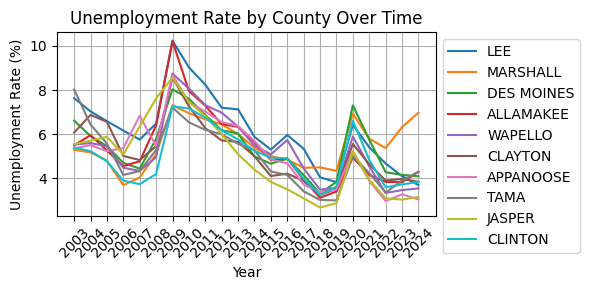

In [ ]:
import matplotlib.pyplot as plt
grouped = unemploymentData.groupby(['area_name', 'year'])['unemployment_rate'].mean().unstack()
# Calculate the average unemployment rate for each county
county_avg_unemployment = grouped.mean(axis=1)

# Sort counties by the highest average unemployment rate and select the top 10
top_10_counties = county_avg_unemployment.nlargest(10).index
# Plot the unemployment rate by county (area_name)
plt.figure(figsize=(6, 3))

# Plot each county's unemployment rates over the years
for county in top_10_counties:
    plt.plot(grouped.columns, grouped.loc[county], label=county)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate by County Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # To place legend outside the plot
plt.grid(True)
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()

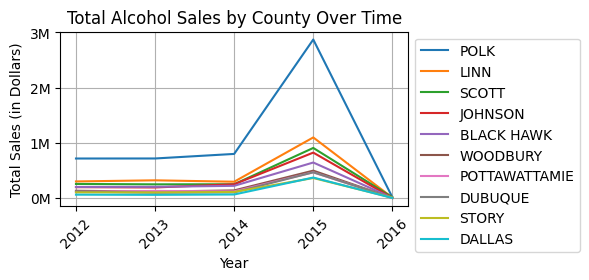

In [ ]:
sales = results_df.copy()
filtered_sales = sales[sales['year'].between(2012, 2016)]
grouped_sales = filtered_sales.groupby(['county', 'year'])['sale_dollars'].sum().unstack()

# Calculate the average sales for each county
county_avg_sales = grouped_sales.mean(axis=1)

# Sort counties by the highest average sales and select the top 10
top_10_counties_sales = county_avg_sales.nlargest(10).index

# Plot total sales by county (county name)
plt.figure(figsize=(6, 3))

# Plot each county's sales over the years
for county in top_10_counties_sales:
    plt.plot(grouped_sales.columns, grouped_sales.loc[county], label=county)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales (in Dollars)')
plt.title('Total Alcohol Sales by County Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.grid(True)
plt.xticks(rotation=45)

def format_func(value, tick_number):
    return f'{int(value / 1e6):,}M'  # Format to millions

# Set the y-axis formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#results_df.drop(columns=['address','city','county_number', 'sale_gallons'], inplace=True)
results_df['year'].value_counts()

,count
year,
2019,327051
2015,89285
2014,27839
2012,27794
2013,27445
2016,572
2017,11
2018,3


In [ ]:
results_df['sale_dollars'] = results_df['sale_dollars'] .astype(float)

In [ ]:
results_df

,invoice_line_no,date,store,name,city,zipcode,county,category,category_name,vendor_no,...,itemno,im_desc,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,month,year
0,S06777900013,2012-07-26,4596,QUIK TRIP #534 / E UNIVERSITY DM,DES MOINES,50317,POLK,1052010,IMPORTED GRAPE BRANDIES,420,...,48099,HENNESSY VS,200.0,5.00,7.50,24,180.00,4.80,7,2012
1,S17277100138,2014-02-06,2552,HY-VEE FOOD STORE #3 / CEDAR RAPIDS,CEDAR RAPIDS,52404,LINN,1012100,CANADIAN WHISKIES,260,...,11366,CROWN ROYAL SPECIAL RESERVE,750.0,24.50,36.74,2,73.48,1.50,2,2014
2,S21803400008,2014-10-15,4191,FAREWAY STORES #995 / PELLA,PELLA,50219,MARION,1022100,TEQUILA,421,...,88766,TORTILLA WHITE TEQUILA,750.0,6.20,9.30,4,37.20,3.00,10,2014
3,S20615000052,2014-08-12,4177,"GOOD LUCK, INC.",LE GRAND,50142,MARSHALL,1062310,SPICED RUM,260,...,43334,CAPTAIN MORGAN SPICED RUM,375.0,5.00,7.50,3,22.50,1.12,8,2014
4,S20002300122,2014-07-09,2576,HY-VEE WINE AND SPIRITS / STORM LAKE,STORM LAKE,50588,BUENA VISTA,1081240,GREEN CREME DE MENTHE,434,...,79336,PARAMOUNT CREME DE MENTHE/GREEN,750.0,4.65,6.97,2,13.94,1.50,7,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,INV-19532300052,2019-05-22,2585,HY-VEE WINE AND SPIRITS / ALGONA,ALGONA,50511,KOSSUTH,1032100,IMPORTED VODKAS,035,...,34421,GREY GOOSE MINI,600.0,20.00,30.00,1,30.00,0.60,5,2019
499996,INV-19458800070,2019-05-20,3952,LOT-A-SPIRITS,BETTENDORF,52722,SCOTT,1041100,AMERICAN DRY GINS,205,...,31470,NEW AMSTERDAM GIN,1000.0,7.33,11.00,12,132.00,12.00,5,2019
499997,INV-19371200050,2019-05-15,2620,HY-VEE / WINDSOR HEIGHTS,WINDSOR HEIGHTS,50311,POLK,1011200,STRAIGHT BOURBON WHISKIES,055,...,21598,TEN HIGH,1750.0,9.24,13.86,6,77.22,10.50,5,2019
499998,INV-19537400004,2019-05-22,3622,WAL-MART 1415 / SPIRIT LAKE,SPIRIT LAKE,51360,DICKINSON,1701100,TEMPORARY & SPECIALTY PACKAGES,260,...,100107,CAPTAIN MORGAN OSR GLASS W/50ML APPLE SMASH & ...,1850.0,18.00,27.00,300,8100.00,555.00,5,2019


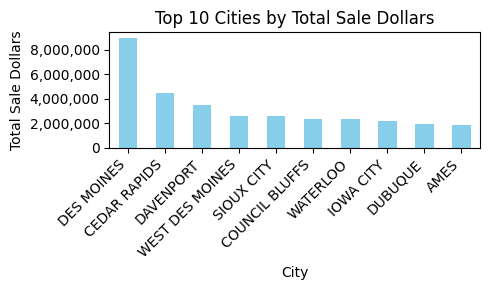

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Assuming 'results_df' is your DataFrame
# Step 1: Group by 'city' and sum 'sale_dollars'
city_sales = results_df.groupby('city')['sale_dollars'].sum()

# Step 2: Select the top 10 cities with the highest total sales
top_10_cities = city_sales.nlargest(10)

# Step 3: Plot a bar chart for the top 10 cities
plt.figure(figsize=(5, 3))

# Plotting the total sales for the top 10 cities
top_10_cities.plot(kind='bar', color='skyblue')

# Step 4: Customize the plot
plt.xlabel('City')
plt.ylabel('Total Sale Dollars')
plt.title('Top 10 Cities by Total Sale Dollars')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Set y-axis ticks in increments of 20,000
max_value = top_10_cities.max()  # Get the max value for scaling the y-axis
plt.yticks(np.arange(0, max_value, 2000000))  # Increment of 20,000

# Step 5: Format y-axis labels as normal numbers, not scientific notation
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')  # Format numbers with commas
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()  # Adjust layout to avoid clipping

# Show the plot
plt.show()


In [ ]:
r

In [ ]:
results_df.columns

Index(['invoice_line_no', 'date', 'store', 'name', 'city', 'zipcode', 'county',
       'category', 'category_name', 'vendor_no', 'vendor_name', 'itemno',
       'im_desc', 'bottle_volume_ml', 'state_bottle_cost',
       'state_bottle_retail', 'sale_bottles', 'sale_dollars', 'sale_liters',
       'month', 'year'],
      dtype='object')